In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import robust

In [2]:
SIZE = 1000
DIMENTION = 5000

In [3]:
normal_distrib = np.random.normal(0,1, size=(DIMENTION,SIZE))
coshi_distrib = np.random.standard_cauchy(size=(DIMENTION,SIZE))
mix_distrib =  0.9 * np.random.normal(0, 1, size=(DIMENTION,SIZE)) + \
                  0.1 * np.random.standard_cauchy(size=(DIMENTION,SIZE))

(array([  9.,  47., 100., 197., 245., 203., 127.,  61.,   9.,   2.]),
 array([-2.82137001, -2.2063537 , -1.5913374 , -0.97632109, -0.36130478,
         0.25371153,  0.86872783,  1.48374414,  2.09876045,  2.71377676,
         3.32879306]),
 <BarContainer object of 10 artists>)

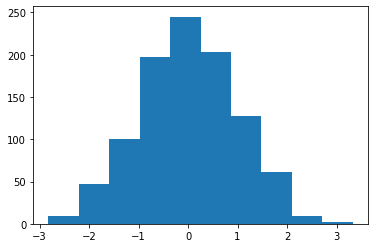

In [4]:
plt.hist(normal_distrib[0])

In [5]:
len(normal_distrib[0])

1000

In [6]:
def my_huber(data):
    x = np.mean(data)
    if abs(x) < 1.44:
        return x
    else:
        return (-1.44,1,44)[x>1.44]
    
def two_stage_estimator_fun(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Вычисление IQR
    iqr = q3 - q1

    # Определение границ для выбросов
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Отбрасывание выбросов
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return np.mean(filtered_data)


In [7]:

means = {'norm':[], 'coshi':[], 'mix':[]}
medians = {'norm':[], 'coshi':[], 'mix':[]}
huber_estimates = {'norm':[], 'coshi':[], 'mix':[]}
two_stage_estimates = {'norm':[], 'coshi':[], 'mix':[]}
for i in range (DIMENTION):
    means['norm'].append(np.mean(normal_distrib[i]))
    means['coshi'].append(np.mean(coshi_distrib[i]))
    means['mix'].append(np.mean(mix_distrib[i]))
    
    medians['norm'].append(np.median(normal_distrib[i]))
    medians['coshi'].append(np.median(coshi_distrib[i]))
    medians['mix'].append(np.median(mix_distrib[i]))
    
    huber_estimates['norm'].append(my_huber(normal_distrib[i]))
    huber_estimates['coshi'].append(my_huber(coshi_distrib[i]))
    huber_estimates['mix'].append(my_huber(mix_distrib[i]))
    
    two_stage_estimates['norm'].append(two_stage_estimator_fun(normal_distrib[i]))
    two_stage_estimates['coshi'].append(two_stage_estimator_fun(coshi_distrib[i]))
    two_stage_estimates['mix'].append(two_stage_estimator_fun(mix_distrib[i]))
    

C:\Users\Bruhonog\AppData\Local\Temp\ipykernel_28944\2263172887.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return (-1.44,1,44)[x>1.44]


In [8]:
#Нормальное распределение 
def res_print(types):
    for type_ in types:
        print(f'\n-------{type_}-------')
        
        print("\nСреднее выборочное:")
        print("Среднее:", np.mean(means[type_]), "Дисперсия:", np.var(means[type_]))

        print("\nВыборочная медиана:")
        print("Среднее:", np.mean(medians[type_]), "Дисперсия:", np.var(medians[type_]))

        print("\nОценка Хубера:")
        print("Среднее:", np.mean(huber_estimates[type_]), "Дисперсия:", np.var(huber_estimates[type_]))

        print("\nДвухэтапная оценка:")
        print("Среднее:", np.mean(two_stage_estimates[type_]), "Дисперсия:", np.var(two_stage_estimates[type_]))
res_print(['norm', 'coshi', 'mix'])


-------norm-------

Среднее выборочное:
Среднее: 4.140904031786548e-05 Дисперсия: 0.0010073952235649462

Выборочная медиана:
Среднее: -0.0003571378095094409 Дисперсия: 0.0015647897442848436

Оценка Хубера:
Среднее: 4.140904031786548e-05 Дисперсия: 0.0010073952235649462

Двухэтапная оценка:
Среднее: 0.0001373319303127546 Дисперсия: 0.0010797270387574184

-------coshi-------

Среднее выборочное:
Среднее: -0.32556298428818037 Дисперсия: 2041.5839864931042

Выборочная медиана:
Среднее: 0.0009617395823826703 Дисперсия: 0.0024445797358953157

Оценка Хубера:
Среднее: -0.06680443065192165 Дисперсия: 0.9037075901490865

Двухэтапная оценка:
Среднее: 0.0009397446914822551 Дисперсия: 0.0034970369770316056

-------mix-------

Среднее выборочное:
Среднее: -1.0601682660488299 Дисперсия: 13587.173760234959

Выборочная медиана:
Среднее: -0.0001585917405772366 Дисперсия: 0.0015016203689966518

Оценка Хубера:
Среднее: -0.008011170521417461 Дисперсия: 0.1502500306104791

Двухэтапная оценка:
Среднее: 0.00

In [9]:
def get_graph(dict_,name):
    name_arr = ['norm', 'coshi', 'mix']
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15))

    for i,type_ in enumerate(dict_.keys()):
        ax[i].set_title(name_arr[i])
        ax[i].plot(dict_[type_])
    fig.suptitle(name,fontsize=20)
    plt.show()

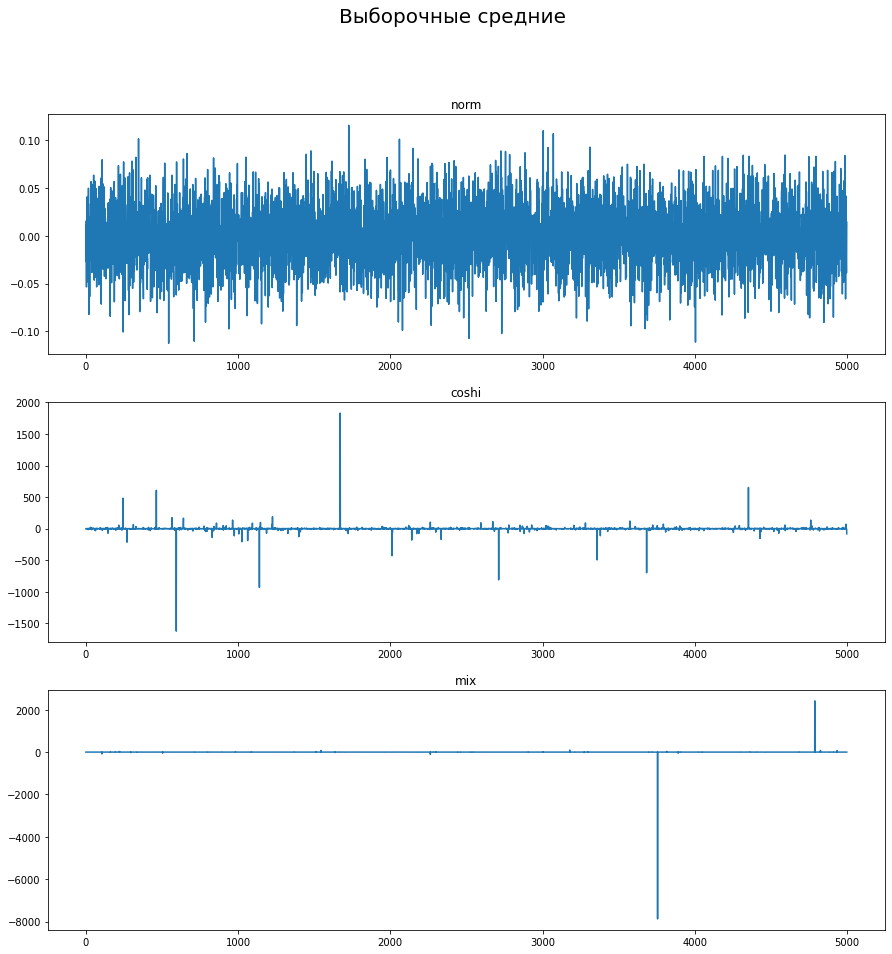

In [10]:
get_graph(means,'Выборочные средние')

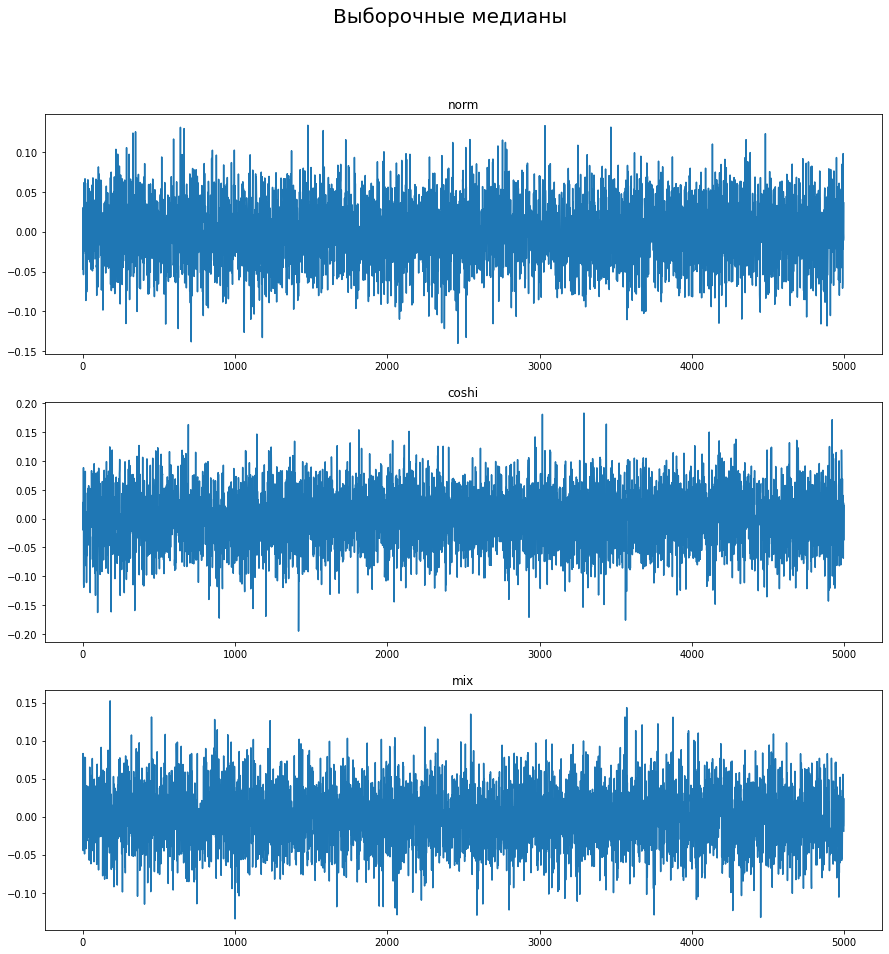

In [11]:
get_graph(medians, 'Выборочные медианы')

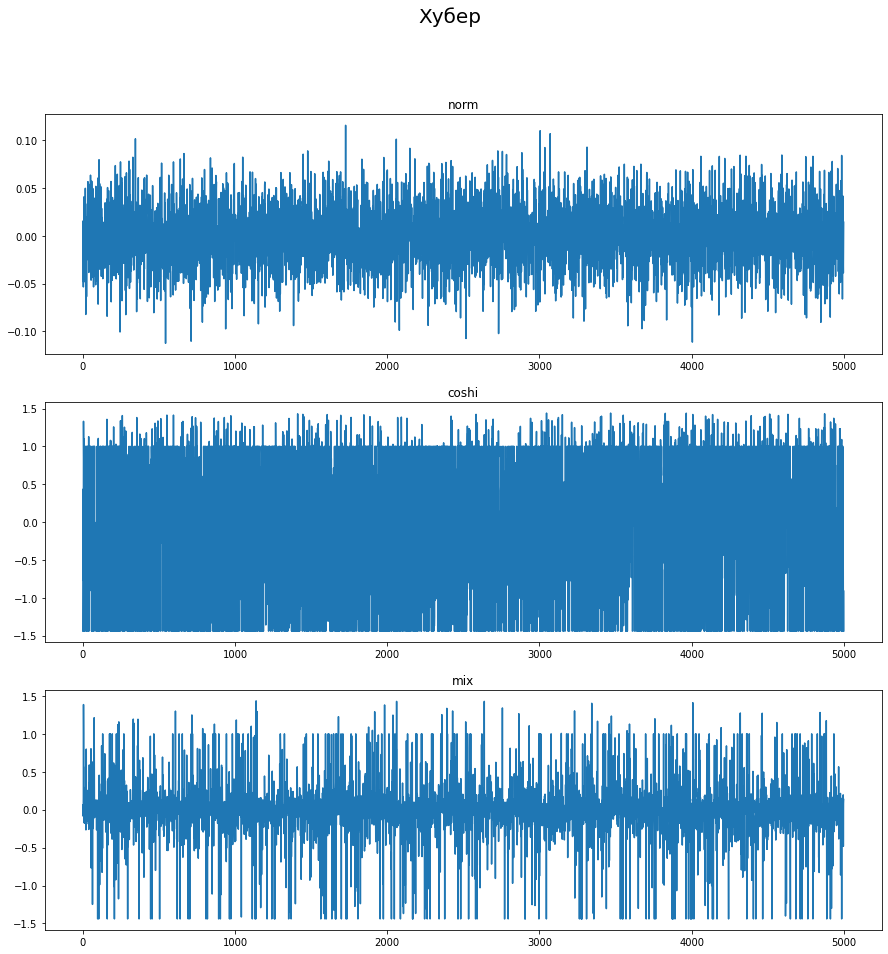

In [12]:
get_graph(huber_estimates, 'Хубер')

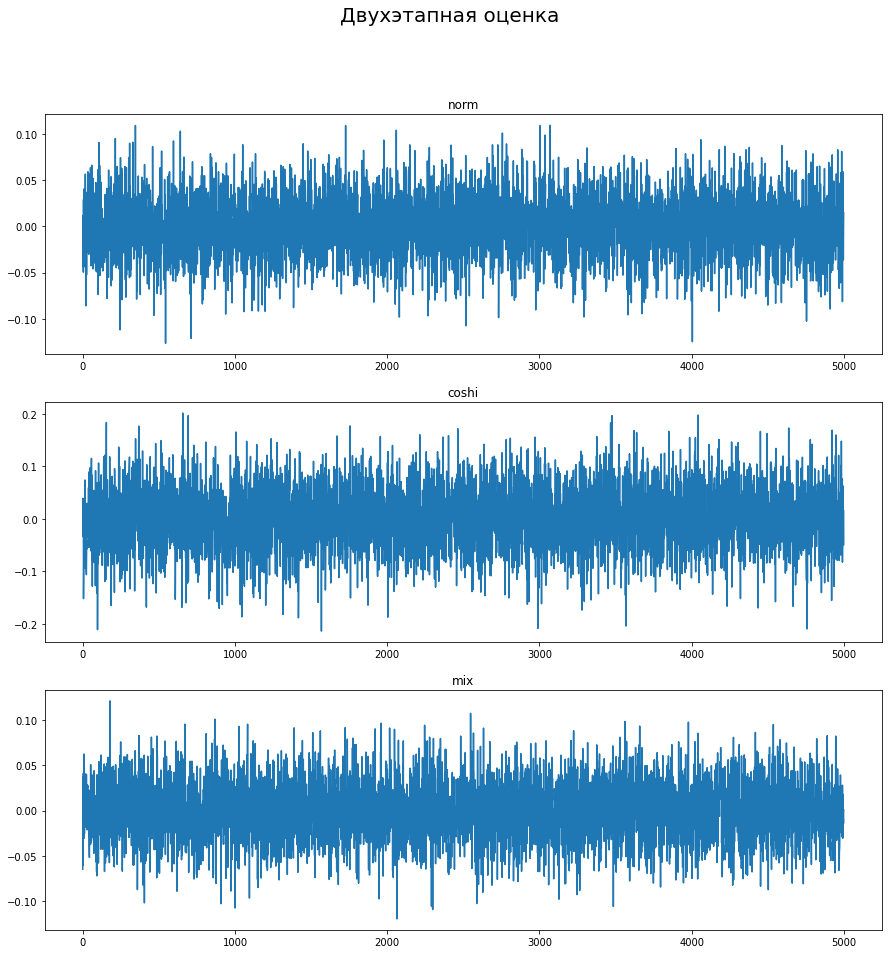

In [13]:
get_graph(two_stage_estimates, 'Двухэтапная оценка')

In [14]:
def get_hist(dict_,name):
    name_arr = ['norm', 'coshi', 'mix']
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,15))

    for i,type_ in enumerate(dict_.keys()):
        ax[i].set_title(name_arr[i])
        ax[i].hist(dict_[type_],bins=20)
    fig.suptitle(name,fontsize=20)
    plt.show()

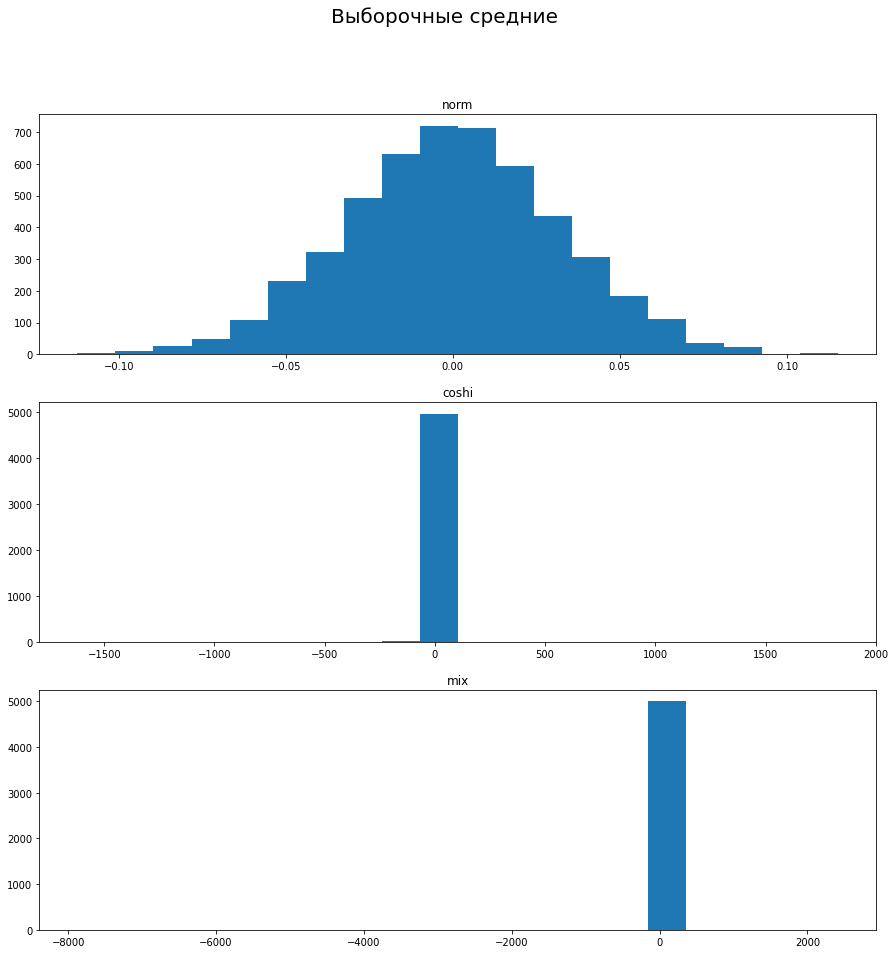

In [15]:
get_hist(means,'Выборочные средние')

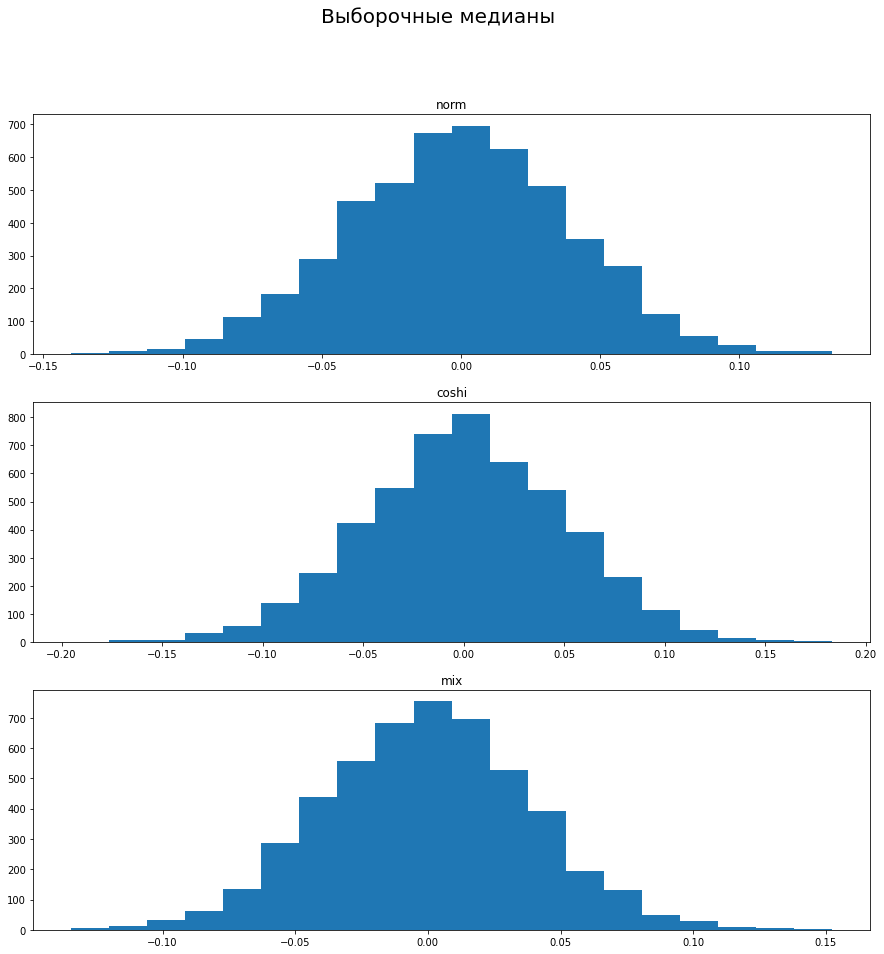

In [16]:
get_hist(medians, 'Выборочные медианы')

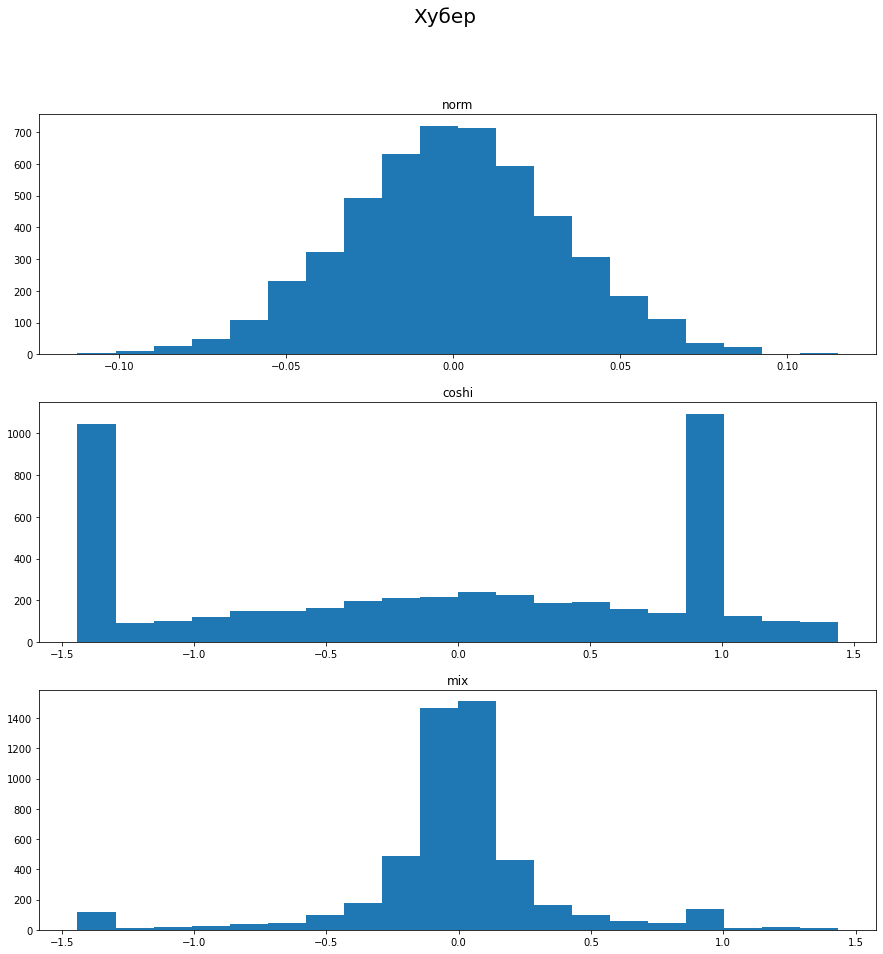

In [17]:
get_hist(huber_estimates,'Хубер')

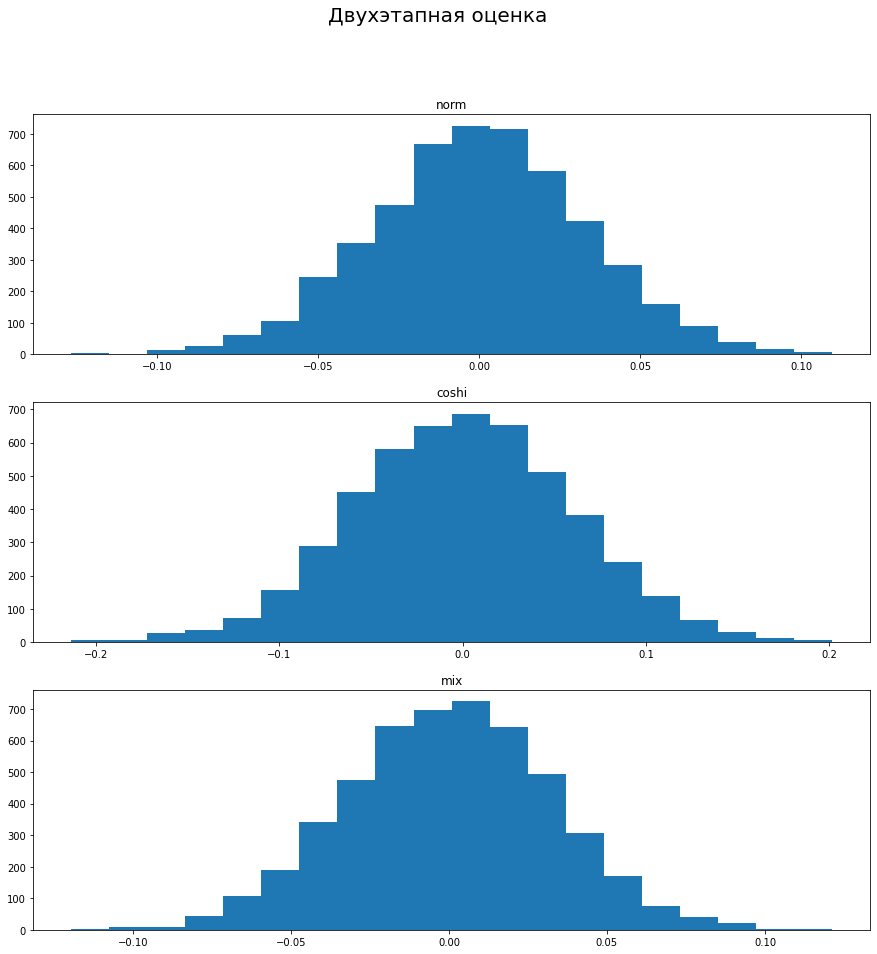

In [18]:
get_hist(two_stage_estimates,'Двухэтапная оценка')